In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

##  Loan_prediction data, prob_t: To identify customer segment, eligible for Loan (Y/N)

## 1. Defining the problem statement
2. Collecting the data
3.Exploratory data analysis
4. Feature engineering
5. Modelling
6. Testing

In [36]:
# Step 1 : Read the input data
df=pd.read_csv("C:\\python\\ml\\loan\\Loan_train_set.csv")

In [37]:
print(df.info())
print(df.shape)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
None
(614, 13)
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325   

In [38]:
# To find missing data in DS
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
# Step 2 : Identify X, Y varaiables
x=df.drop(['Loan_Status'], axis=1)
x.shape

(614, 12)

In [40]:
y=df[['Loan_Status']]
y.shape

(614, 1)

## Step 3 :Visualise the datas in graph

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E0336D8>,
      dtype=object)

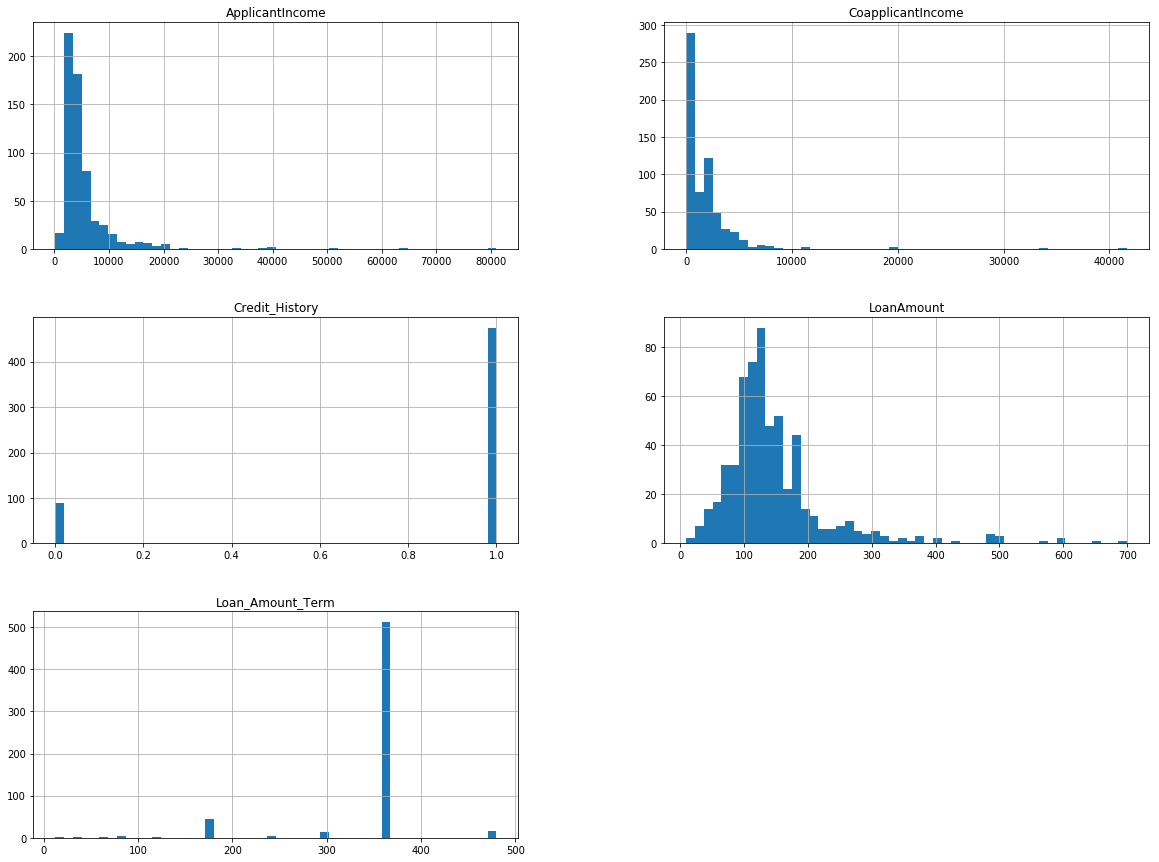

In [41]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))

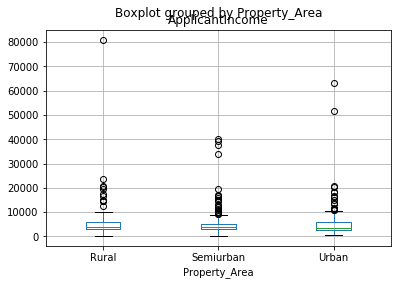

In [42]:
df.boxplot(column='ApplicantIncome', by='Property_Area', )

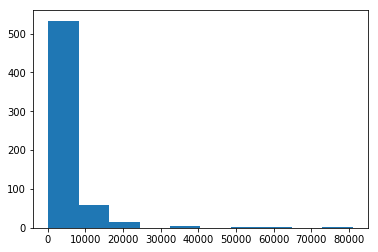

In [43]:

plt.hist(df['ApplicantIncome'])
plt.show()

In [44]:
# Analyse correlation between varaiables
corr_matrix= x.corr()
corr_matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CC78710>,
      dtype=object)

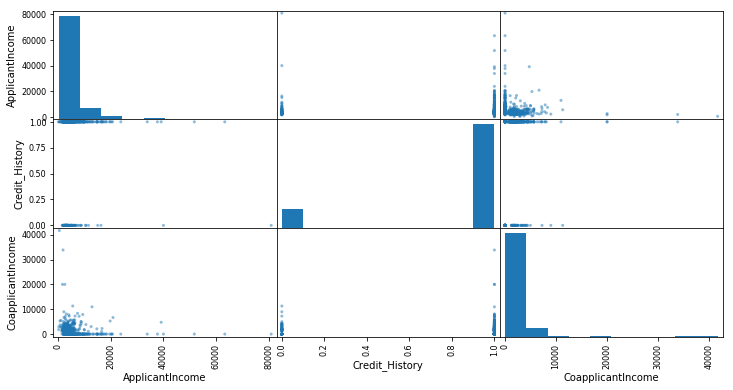

In [45]:
# from pandas.tools.plotting import scatter_matrix 

from pandas.plotting import scatter_matrix

attributes = ["ApplicantIncome", "Credit_History", "CoapplicantIncome"]
scatter_matrix(df[attributes], figsize=(12, 6))

In [46]:
s3=x.groupby('Property_Area')
s3

In [47]:
for Gender,ApplicantIncome in s3:
    print(Gender)
    print(ApplicantIncome)

Rural
      Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
13   LP001029    Male      No          0      Graduate            No   
18   LP001038    Male     Yes          0  Not Graduate            No   
23   LP001050     NaN     Yes          2  Not Graduate            No   
32   LP001097    Male      No          1      Graduate           Yes   
34   LP001100    Male      No         3+      Graduate            No   
57   LP001197    Male     Yes          0      Graduate            No   
62   LP001207    Male     Yes          0  Not Graduate           Yes   
63   LP001213    Male     Yes          1      Graduate            No   
107  LP001370    Male      No          0  Not Graduate           NaN   
112  LP001391    Male     Yes          0  Not Graduate            No   
115  LP001401    Male     Yes          1      Graduate            No   
118  LP001421    Male     Yes          0      Graduate    

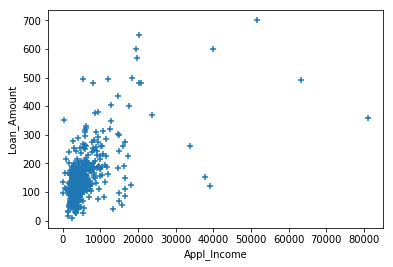

In [48]:
# Visualise scatter plot based on income Vs Loan Amount

plt.scatter(x.ApplicantIncome,x.LoanAmount,marker='+')
plt.xlabel('Appl_Income')
plt.ylabel('Loan_Amount')
plt.show()

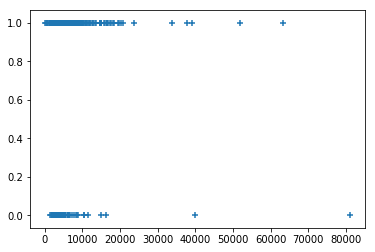

In [49]:
plt.scatter(x.ApplicantIncome,x.Credit_History,marker='+')

In [50]:
x1=x['Gender'].value_counts()
x1

Male      489
Female    112
Name: Gender, dtype: int64

In [51]:
x2=x['Married'].value_counts()
x2

Yes    398
No     213
Name: Married, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E962C50>]],
      dtype=object)

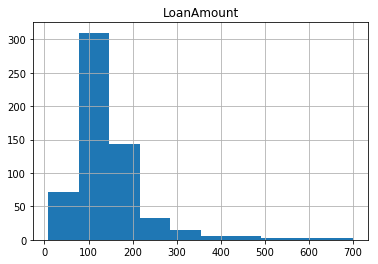

In [52]:
x.hist('LoanAmount')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E997320>]],
      dtype=object)

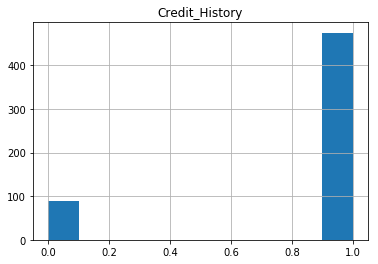

In [53]:
x.hist('Credit_History')

In [54]:
# Missing count in Credit_history
sum(x['Credit_History'].isnull())

50

## Relationship between Features and Loan_status

In [55]:
# converting Categorical data to numerical by labelencoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Loan_Status=le.fit_transform(df.Loan_Status)
y=df.Loan_Status

In [56]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [57]:
loan_y= df[df['Loan_Status']==1]
loan_N=df[df['Loan_Status']==0]
print("Loan_stat_Yes  %i (%.1f%%)"%(len(loan_y),float(len(loan_y)/len(y)*100)))
print("Loan_stat_No  %i (%.1f%%)"%(len(loan_N),float(len(loan_N)/len(y)*100)))
print("Total",len(y))

Loan_stat_Yes  422 (68.7%)
Loan_stat_No  192 (31.3%)
Total 614


## credit_history vs Loan_status

In [58]:
x.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [59]:
# Groupby Gender , Loan_status
f=df.groupby('Gender').Loan_Status.value_counts()  
f


Gender  Loan_Status
Female  1               75
        0               37
Male    1              339
        0              150
Name: Loan_Status, dtype: int64

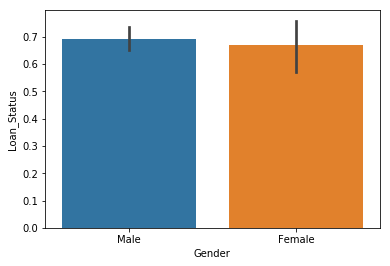

In [60]:
sns.barplot(x='Gender', y='Loan_Status',data=df)



# here bargraph represent mean value of male & femal =1
# eg 75+37= 112
# Mean of getting 1 value = 75/112= 0.66


## Bar Chart for Categorical Features 

'Gender', 'Married', 'Dependents', 'Education','Property_Area'

In [61]:
#  Creating function 
global feature
def bar_chart(feature):
    s1 = df[df['Loan_Status']==1][feature].value_counts()
    d1 = df[df['Loan_Status']==0][feature].value_counts()
    gf = pd.DataFrame([s1,d1])
    gf.index = ['Loan_status_Yes','Loan_status_No']
    gf.plot(kind='bar',stacked=False, figsize=(10,5))

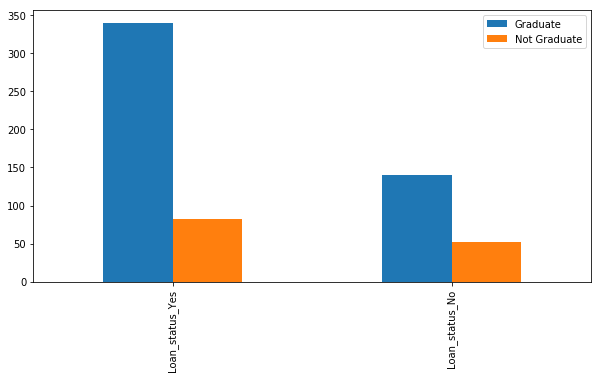

In [62]:
bar_chart('Education')

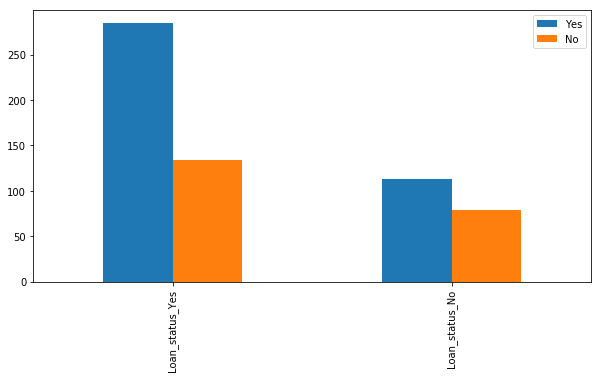

In [63]:
bar_chart('Married')

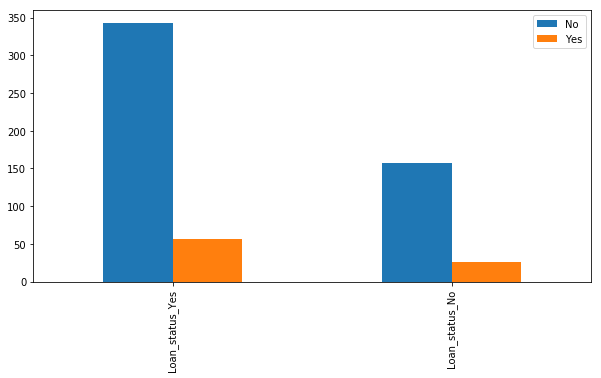

In [64]:
bar_chart('Self_Employed')

In [65]:
df.groupby('Self_Employed').Loan_Status.value_counts()

Self_Employed  Loan_Status
No             1              343
               0              157
Yes            1               56
               0               26
Name: Loan_Status, dtype: int64

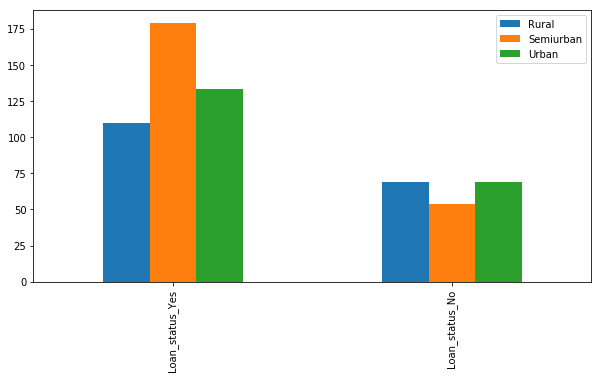

In [66]:
bar_chart('Property_Area')

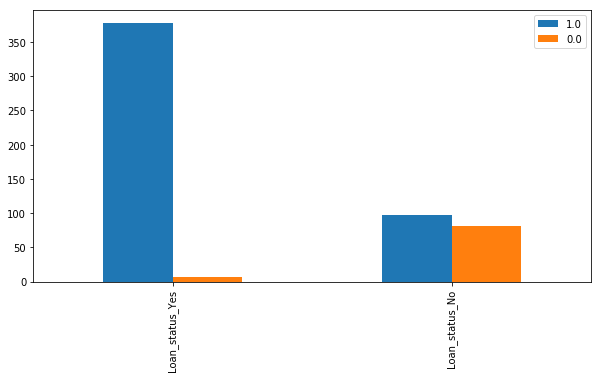

In [67]:
bar_chart('Credit_History')

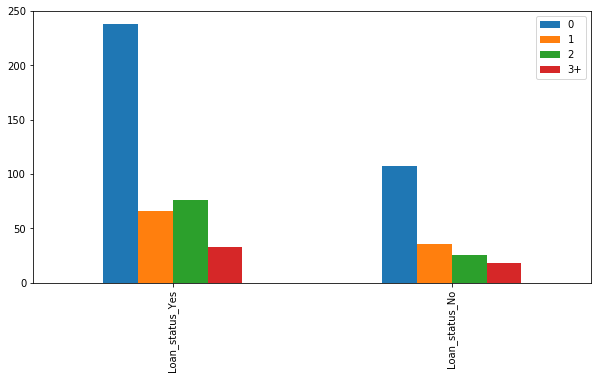

In [68]:
bar_chart('Dependents')

In [69]:
# Missing value
#df['Credit_History'].fillna(value=1,inplace=True)

In [70]:
# Missing value filed Credit_History based on Proerty area
x['Credit_History'] = x['Credit_History'].fillna(df.groupby('Property_Area')['Credit_History'].transform('mean'))

In [71]:
x.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.00000,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.00000,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.00000,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.00000,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.00000,Urban
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.00000,Urban
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.00000,Urban
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.00000,Semiurban
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.00000,Urban
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.00000,Semiurban


In [72]:
# Missing value filed LoanAmount based on Proerty area
x['LoanAmount'] = x['LoanAmount'].fillna(df.groupby('Education')['LoanAmount'].transform('mean'))

In [73]:
x.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
dtype: int64

In [74]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,154.060215,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban


In [75]:
x=x.replace({'Dependents': "3+"},np.nan)
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,154.060215,360.0,1.000000,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.000000,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.000000,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.000000,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.000000,Urban
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.000000,Urban
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.000000,Urban
7,LP001014,Male,Yes,NaN,Graduate,No,3036,2504.0,158.000000,360.0,0.000000,Semiurban
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.000000,Urban
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.000000,Semiurban


In [76]:
# Missing value filed LoanAmount based on Proerty area
x = x.fillna(0)
x.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,154.060215,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban
7,LP001014,Male,Yes,0,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban


In [77]:
# Label encoding for Education,property_area
le_Edu=LabelEncoder()
le_PA=LabelEncoder()
#le_gen=LabelEncoder()
x.Education=le_Edu.fit_transform(x.Education)
x.Property_Area=le_PA.fit_transform(x.Property_Area)
#x.Gender=le_gen.fit_transform(x.Gender)


In [78]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,0,No,5849,0.0,154.060215,360.0,1.0,2
1,LP001003,Male,Yes,1,0,No,4583,1508.0,128.000000,360.0,1.0,0
2,LP001005,Male,Yes,0,0,Yes,3000,0.0,66.000000,360.0,1.0,2
3,LP001006,Male,Yes,0,1,No,2583,2358.0,120.000000,360.0,1.0,2
4,LP001008,Male,No,0,0,No,6000,0.0,141.000000,360.0,1.0,2


In [79]:
x=x.drop(['Gender','Married','Self_Employed','Loan_Amount_Term'],axis=1)

In [80]:
x.isnull().sum()

Loan_ID              0
Dependents           0
Education            0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
dtype: int64

In [81]:
y=df.Loan_Status
y.head()
x.head(15)


,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,LP001002,0,0,5849,0.0,154.060215,1.0,2
1,LP001003,1,0,4583,1508.0,128.000000,1.0,0
2,LP001005,0,0,3000,0.0,66.000000,1.0,2
3,LP001006,0,1,2583,2358.0,120.000000,1.0,2
4,LP001008,0,0,6000,0.0,141.000000,1.0,2
5,LP001011,2,0,5417,4196.0,267.000000,1.0,2
6,LP001013,0,1,2333,1516.0,95.000000,1.0,2
7,LP001014,0,0,3036,2504.0,158.000000,0.0,1
8,LP001018,2,0,4006,1526.0,168.000000,1.0,2
9,LP001020,1,0,12841,10968.0,349.000000,1.0,1


In [82]:
x=x.set_index('Loan_ID')
x

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
Loan_ID,,,,,,,
LP001002,0,0,5849,0.0,154.060215,1.000000,2
LP001003,1,0,4583,1508.0,128.000000,1.000000,0
LP001005,0,0,3000,0.0,66.000000,1.000000,2
LP001006,0,1,2583,2358.0,120.000000,1.000000,2
LP001008,0,0,6000,0.0,141.000000,1.000000,2
LP001011,2,0,5417,4196.0,267.000000,1.000000,2
LP001013,0,1,2333,1516.0,95.000000,1.000000,2
LP001014,0,0,3036,2504.0,158.000000,0.000000,1
LP001018,2,0,4006,1526.0,168.000000,1.000000,2


## Applying Logistic_model

In [83]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
lr.score(x,y)

0.8110749185667753

In [85]:
lr.predict([[1,0,2583,2358,120,1,2]])

array([1], dtype=int64)

In [86]:
lr.predict([[0,0,3036,2504,158,0,1]])

array([0], dtype=int64)

In [87]:
t1=lr.predict(x)
t1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [88]:
# Apply to Random forest regression

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=20 )
rf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
rf.score(x,y)

1.0

## Now applying same model in test dataset

In [91]:
t=pd.read_csv("C:\\python\\ml\\loan\\Loan_test_set.csv")

In [92]:
df21=t


In [93]:
df21.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [94]:
# Missing value filed Credit_History based on Proerty area
df21['Credit_History'] = df21['Credit_History'].fillna(df21.groupby('Property_Area')['Credit_History'].transform('mean'))

In [95]:
df21.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.861538,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban


In [96]:
# Missing value filed LoanAmount based on Proerty area
df21['LoanAmount'] = df21['LoanAmount'].fillna(df21.groupby('Education')['LoanAmount'].transform('mean'))

In [97]:
df21=df21.replace({'Dependents': "3+"},np.nan)
df21

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.861538,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.000000,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.000000,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.000000,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.000000,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.000000,Semiurban


In [98]:
df21=df21.fillna(0)

In [99]:
# Label encoding for Education,property_area
le_Edu=LabelEncoder()
le_PA=LabelEncoder()
#le_gen=LabelEncoder()
df21.Education=le_Edu.fit_transform(df21.Education)
df21.Property_Area=le_PA.fit_transform(df21.Property_Area)

In [100]:
df21.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,0,No,5720,0,110.0,360.0,1.000000,2
1,LP001022,Male,Yes,1,0,No,3076,1500,126.0,360.0,1.000000,2
2,LP001031,Male,Yes,2,0,No,5000,1800,208.0,360.0,1.000000,2
3,LP001035,Male,Yes,2,0,No,2340,2546,100.0,360.0,0.861538,2
4,LP001051,Male,No,0,1,No,3276,0,78.0,360.0,1.000000,2
5,LP001054,Male,Yes,0,1,Yes,2165,3422,152.0,360.0,1.000000,2
6,LP001055,Female,No,1,1,No,2226,0,59.0,360.0,1.000000,1
7,LP001056,Male,Yes,2,1,No,3881,0,147.0,360.0,0.000000,0
8,LP001059,Male,Yes,2,0,0,13633,0,280.0,240.0,1.000000,2
9,LP001067,Male,No,0,1,No,2400,2400,123.0,360.0,1.000000,1


In [101]:
df21=df21.drop(['Gender','Married','Self_Employed','Loan_Amount_Term'],axis=1)
df21.head(30)

,Loan_ID,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,LP001015,0,0,5720,0,110.0,1.000000,2
1,LP001022,1,0,3076,1500,126.0,1.000000,2
2,LP001031,2,0,5000,1800,208.0,1.000000,2
3,LP001035,2,0,2340,2546,100.0,0.861538,2
4,LP001051,0,1,3276,0,78.0,1.000000,2
5,LP001054,0,1,2165,3422,152.0,1.000000,2
6,LP001055,1,1,2226,0,59.0,1.000000,1
7,LP001056,2,1,3881,0,147.0,0.000000,0
8,LP001059,2,0,13633,0,280.0,1.000000,2
9,LP001067,0,1,2400,2400,123.0,1.000000,1


In [102]:
df21=df21.set_index('Loan_ID')
df21

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
Loan_ID,,,,,,,
LP001015,0,0,5720,0,110.0,1.000000,2
LP001022,1,0,3076,1500,126.0,1.000000,2
LP001031,2,0,5000,1800,208.0,1.000000,2
LP001035,2,0,2340,2546,100.0,0.861538,2
LP001051,0,1,3276,0,78.0,1.000000,2
LP001054,0,1,2165,3422,152.0,1.000000,2
LP001055,1,1,2226,0,59.0,1.000000,1
LP001056,2,1,3881,0,147.0,0.000000,0
LP001059,2,0,13633,0,280.0,1.000000,2


## apply model on test set 

In [103]:
y_pred =lr.predict(df21)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [104]:
lr.score(df21,y_pred)

1.0

## ## Using Crossval function

In [106]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(),df21,y_pred)

array([1., 1., 1.])

## RFS

In [ ]:
y_pred1=rf.predict(df21)

In [ ]:
rf.score(df21,y_pred1)

##  Submission Format for Validation result

In [ ]:
submission=pd.DataFrame({"Loan_ID" : t["Loan_ID"],"Loan_Status": y_pred })
submission.to_csv('Loan_Result.csv',index=False)
submission.head()